In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px


In [2]:
df = pd.read_csv('../../Combine_Data/men/ph_encoded.csv')


In [3]:

# Assuming df is your DataFrame
labels = ["No Medal", "Medal"]
medal_distribution = df['medal'].value_counts().tolist()

fig = px.pie(values=medal_distribution, names=labels, width=700, height=400,
             color_discrete_sequence=["skyblue", "black"], title="Medal vs No Medal Distribution")
fig.show()


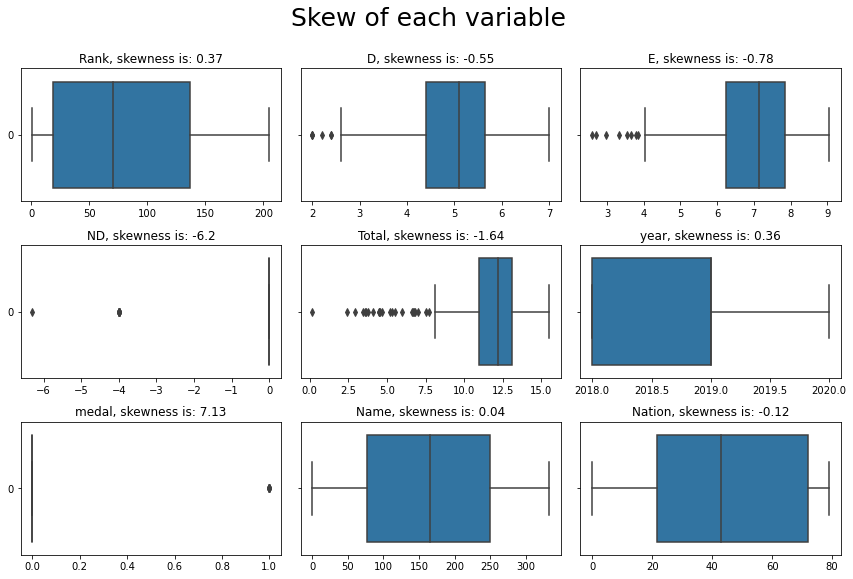

In [4]:
# Assuming you want to include all numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(12,8))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()

    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis=0, skipna=True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Skew of each variable')
plt.tight_layout()
plt.show()


Stratified splitting

Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

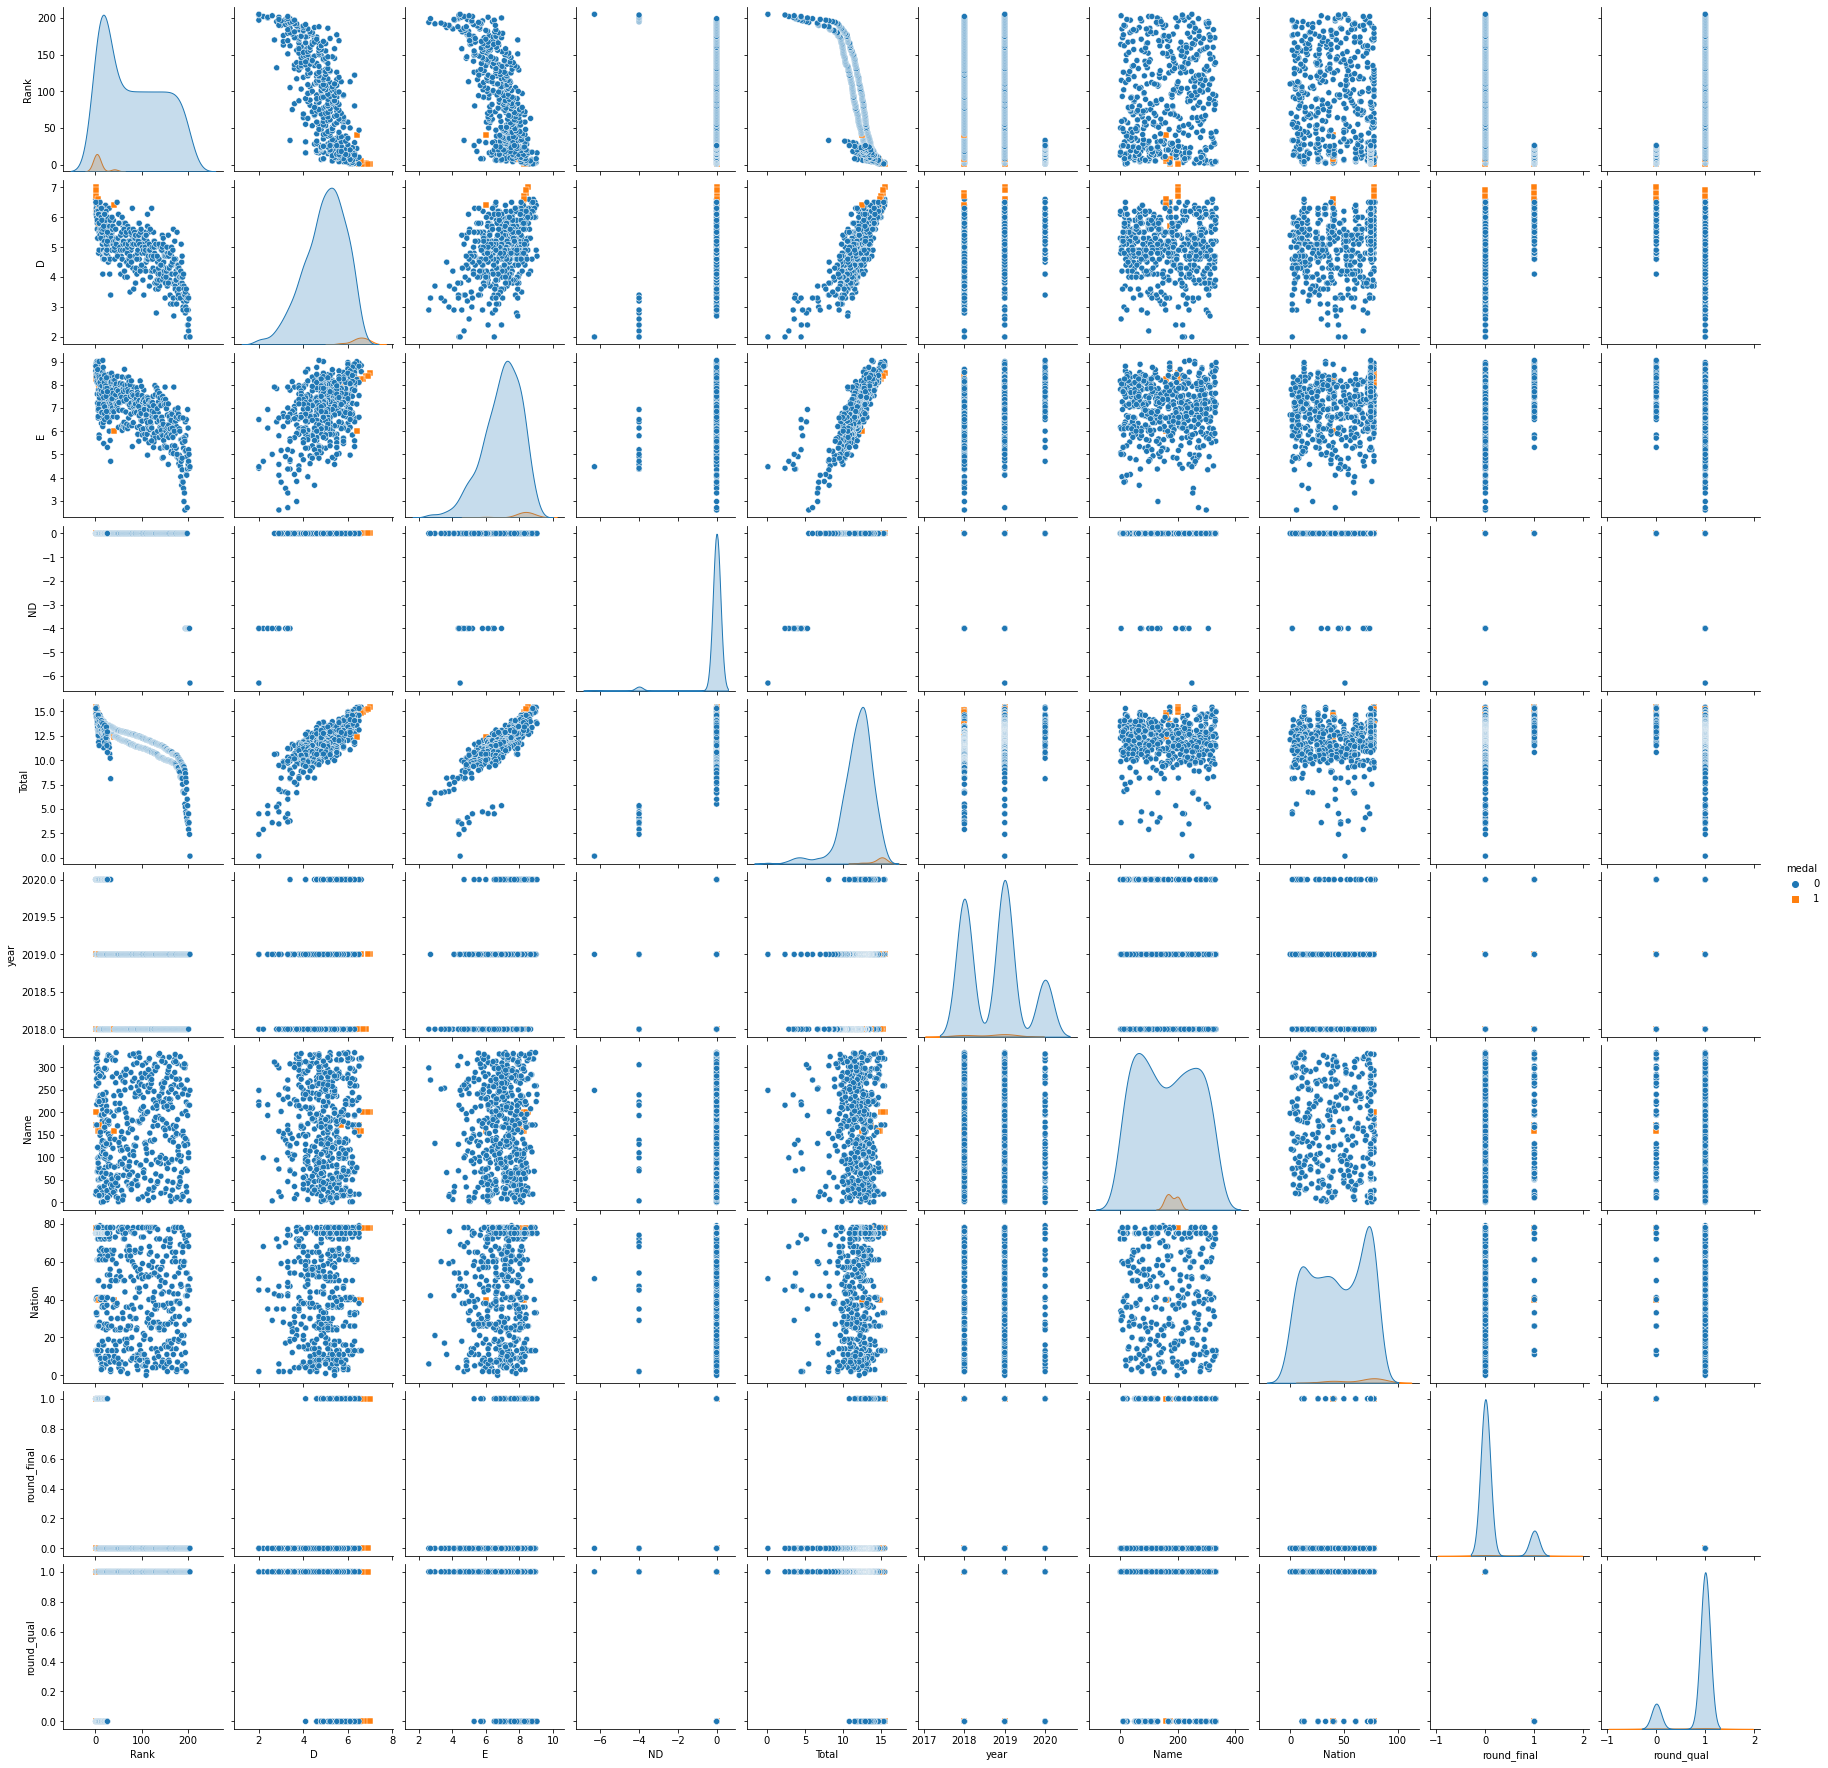

In [5]:
sns.pairplot(df, hue='medal', diag_kind='kde', markers=["o", "s"])
plt.show()


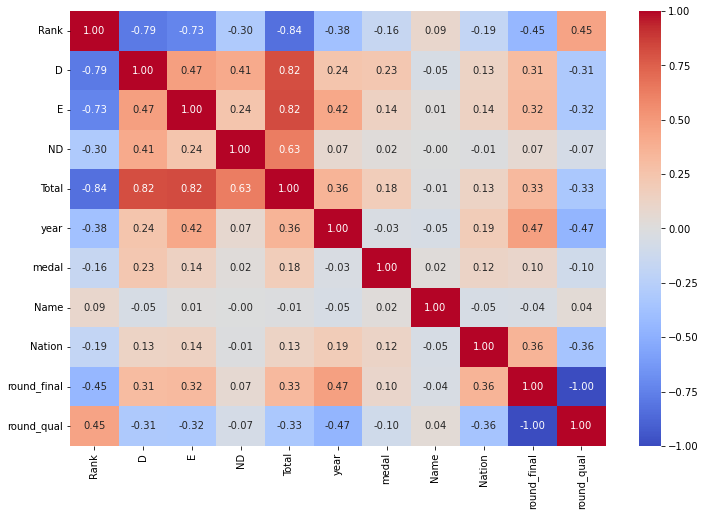

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


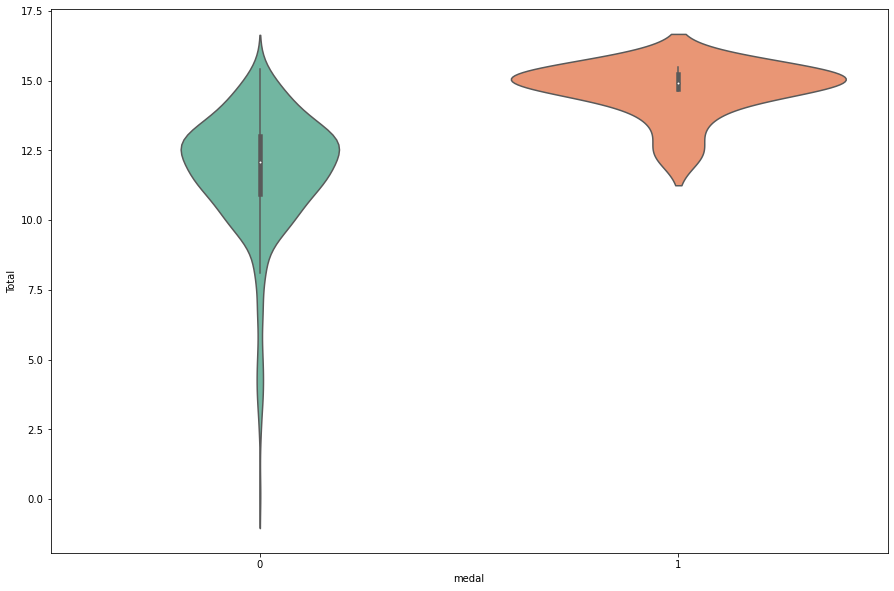

In [7]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='medal', y='Total', data=df, palette="Set2")
plt.show()


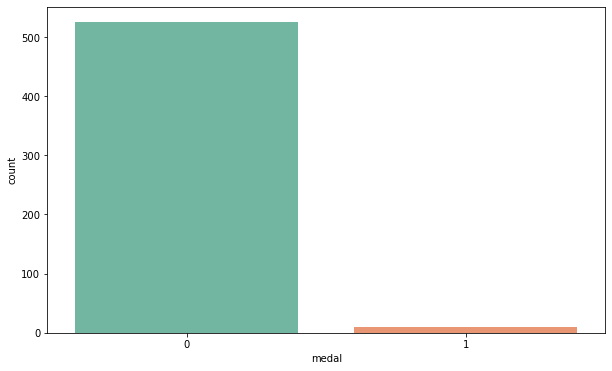

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='medal', data=df, palette="Set2")
plt.show()
